In [18]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import math
import seaborn as sns

## Постановка задачи:
Сгенерировать выборки размером 20, 60 и 100 элементов.
Построить на них эмпирические функции распределения и ядерные
оценки плотности распределения на отрезке [−4; 4] для непрерывных
распределений и на отрезке [6; 14] для распределения Пуассона.


In [2]:
dist_size = [20, 60, 100]
loc, scale = 0.0, 1.0

## Функции распределения:

In [42]:
def norm(size):
    return random.normal(loc, scale, size)

def cauchy(size):
    return random.standard_cauchy(size)

def laplace(size):
    return random.laplace(loc, 1 / np.sqrt(2), size)

def poisson(size):
    return random.poisson(10, size)

def uniform(size):
    return  random.uniform(-np.sqrt(3), np.sqrt(3), size)

distribution_fun = { 'norm' : norm,
                     'cauchy' : cauchy,
                     'laplace' : laplace,
                     'poisson' : poisson,
                     'uniform' : uniform, }

def norm_cdf(x):
    return  stats.norm.cdf(x)

def cauchy_cdf(x):
    return stats.cauchy.cdf(x)

def laplace_cdf(x):
    return stats.laplace.cdf(x)

def poisson_cdf(x):
    return stats.poisson.cdf(x, 10)

def uniform_cdf(x):
    return stats.uniform.cdf(x)

cdf_distribution = { 'norm' : norm_cdf,
                     'cauchy' : cauchy_cdf,
                     'laplace' : laplace_cdf,
                     'poisson' : poisson_cdf,
                     'uniform' : uniform_cdf, }

def norm_pdf(x):
    return  stats.norm.pdf(x, 0, 1)

def cauchy_pdf(x):
    return stats.cauchy.pdf(x)

def laplace_pdf(x):
    return stats.laplace.pdf(x, 0, 1 / 2 ** 0.5)

def poisson_pmf(x):
    return stats.poisson.pmf(x, 10)

def uniform_pdf(x):
    return stats.uniform.pdf(x, -math.sqrt(3), 2 * math.sqrt(3))

pdf_distribution = { 'norm' : norm_pdf,
                     'cauchy' : cauchy_pdf,
                     'laplace' : laplace_pdf,
                     'poisson' : poisson_pmf,
                     'uniform' : uniform_pdf, }

def start_stop_step(name):
    if name == 'poisson':
        return (6,14,1)
    else: return (-4, 4, 0.01)
    

In [43]:
def get_samples(name):   
    samples = []
    start,stop,step = start_stop_step(name)
    x = np.arange(start, stop, step)
    for size in dist_size:
        sample = distribution_fun[name](size)
        res_sample = []
        for el in sample:
            if el >= start or el <= stop:
                res_sample.append(el)
        samples.append(res_sample)
    return samples, x, start, stop         

##  Построение эмпирических функций распределения:

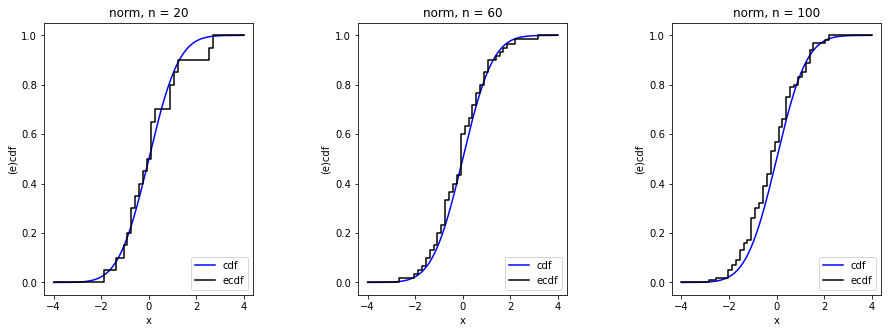

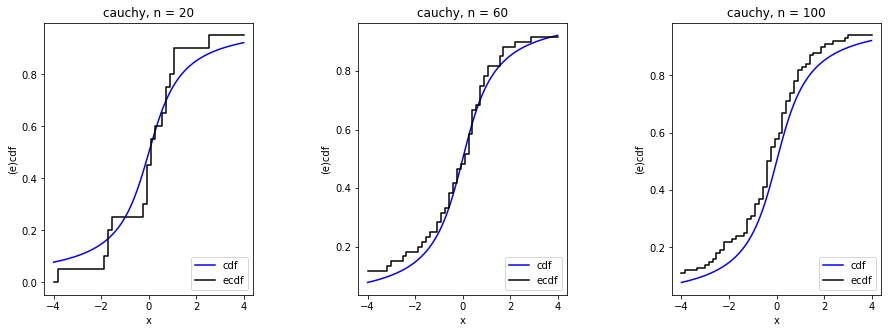

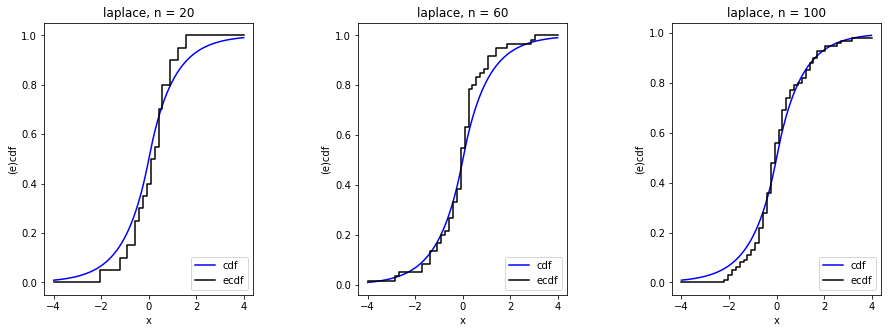

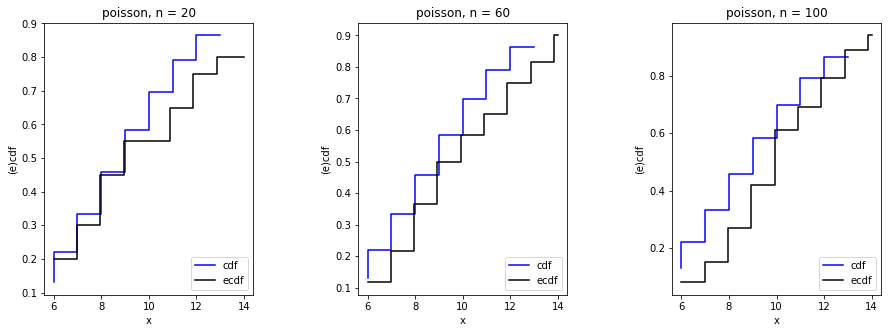

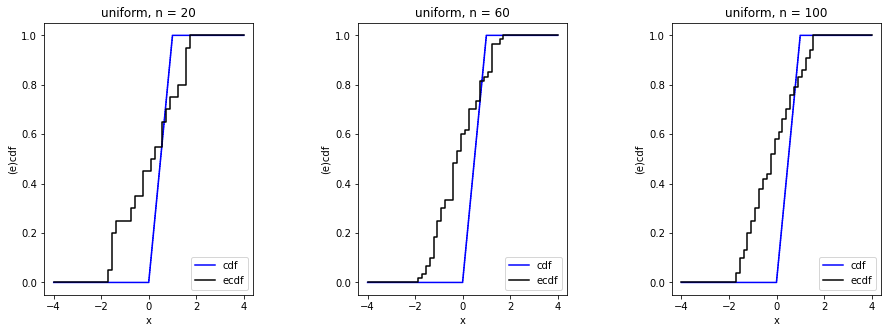

In [56]:
def plot_distribution(name):
    samples, x, start, stop = get_samples(name)
    index = 1
    f, axs = plt.subplots(1,3,figsize=(15,5))
    for sample in samples: 
        plt.subplot(1, 3, index)   
        plt.title(name + ', n = ' + str(dist_size[index - 1]))
        if name == 'poisson' or name == 'uniform':
             plt.step(x, cdf_distribution[name](x), color='blue', label='cdf')
        else:
            plt.plot(x, cdf_distribution[name](x), color='blue', label='cdf')
        array = np.linspace(start, stop)
        ecdf = ECDF(sample)
        y = ecdf(array)
        plt.step(array, y, color='black', label='ecdf')
        plt.xlabel('x')
        plt.ylabel('(e)cdf')
        plt.legend(loc='lower right')
        plt.subplots_adjust(wspace=0.5)        
        plt.savefig(name + str(dist_size[index - 1]) + '.png', format='png')
        index += 1
        
for name in distribution_fun:
    plot_distribution(name)
        

## Построение ядерных оценок плотности распределения:

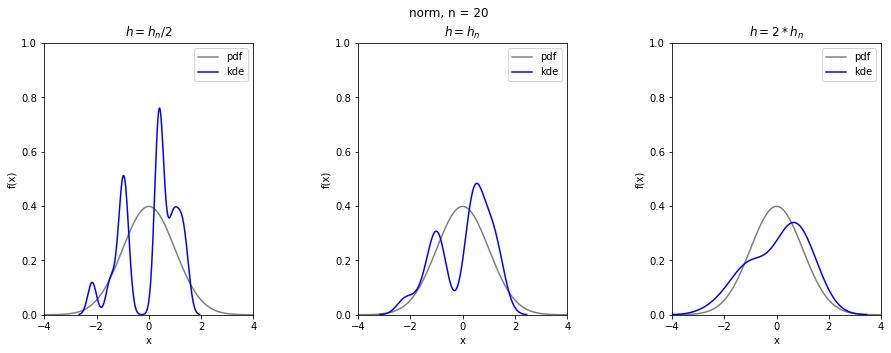

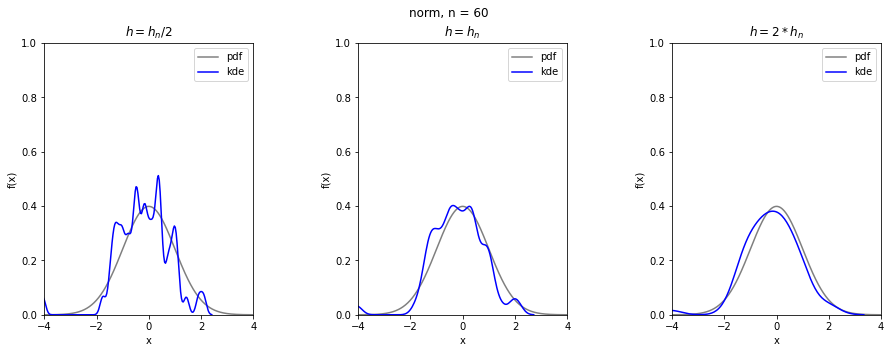

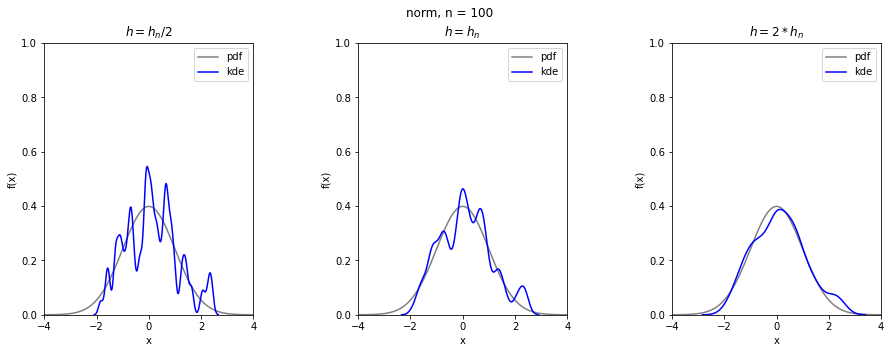

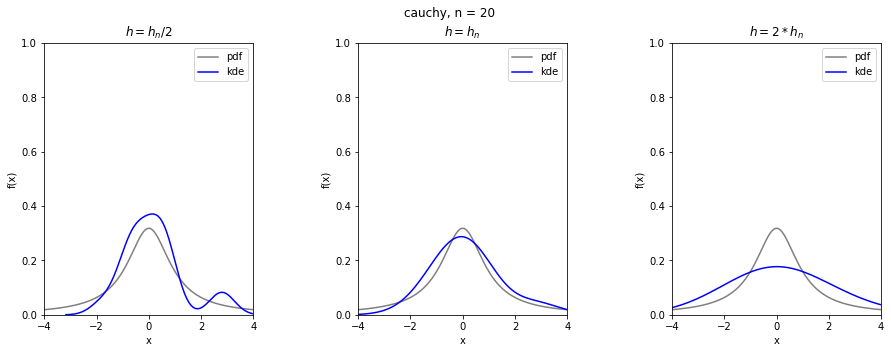

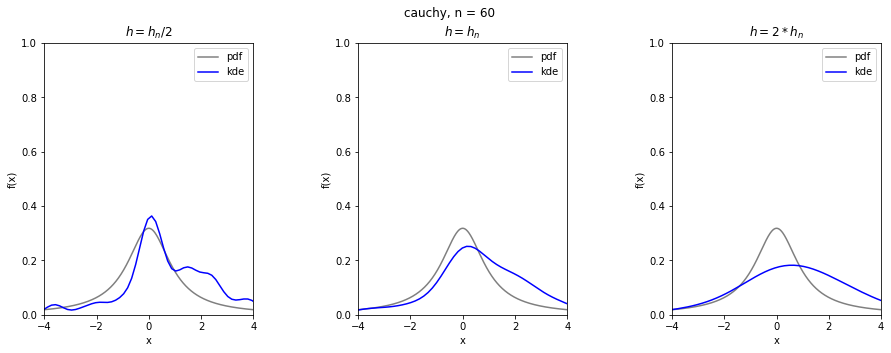

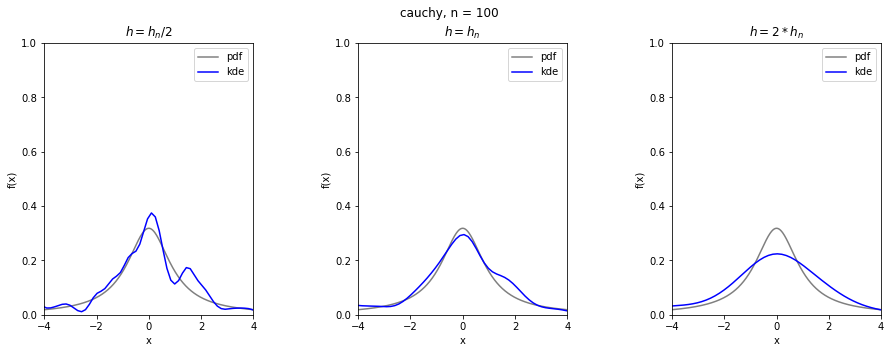

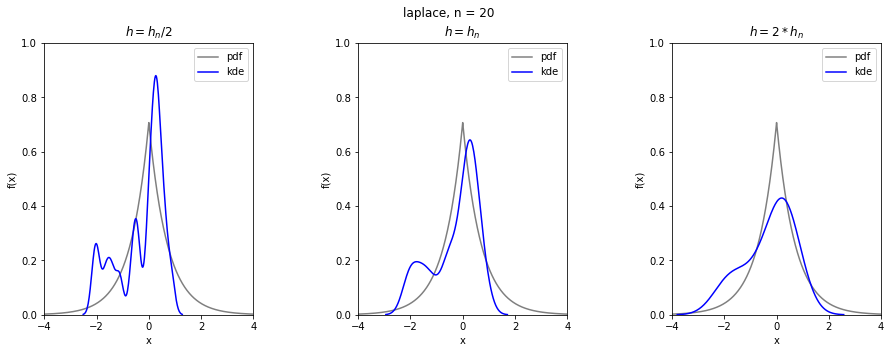

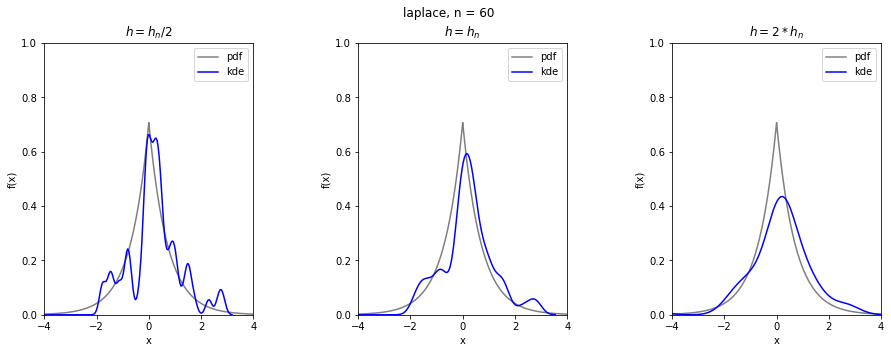

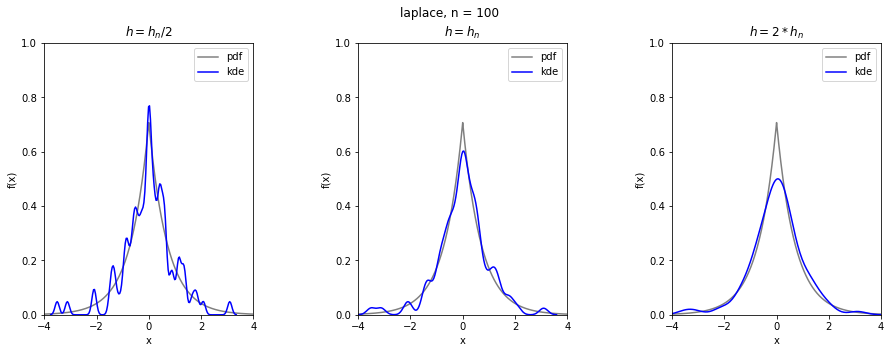

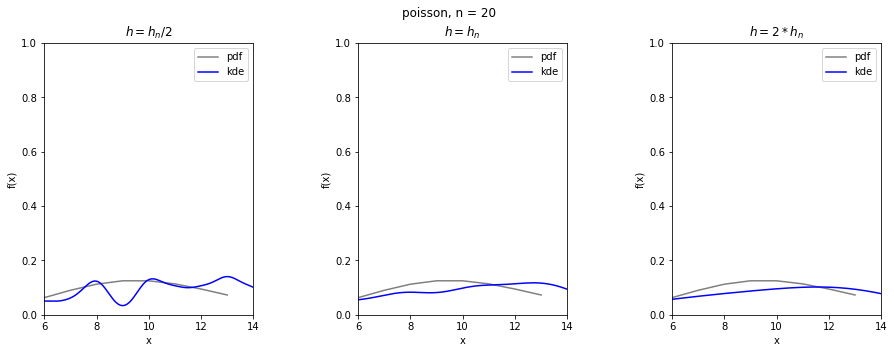

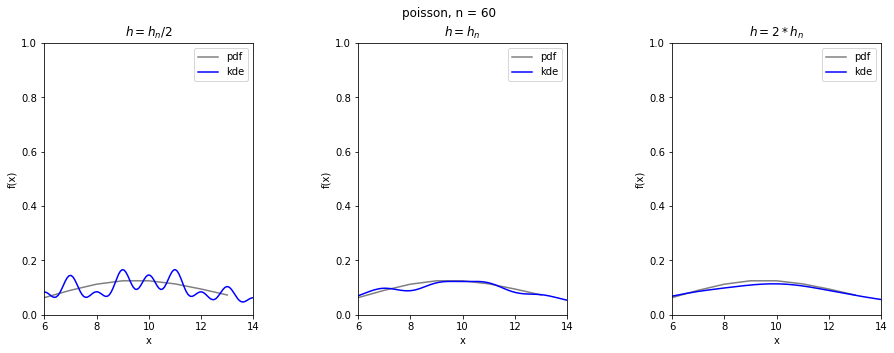

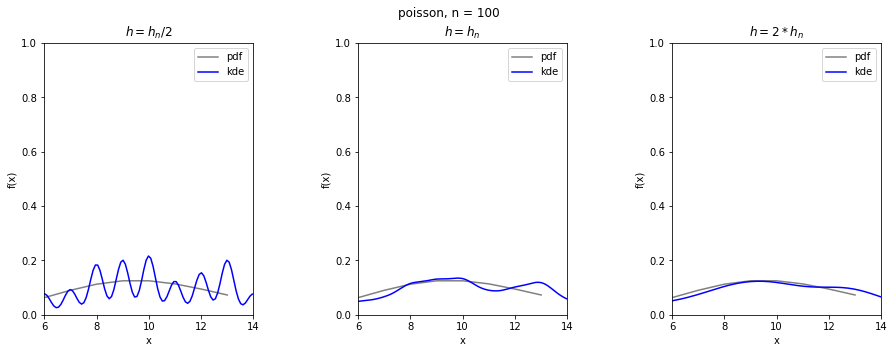

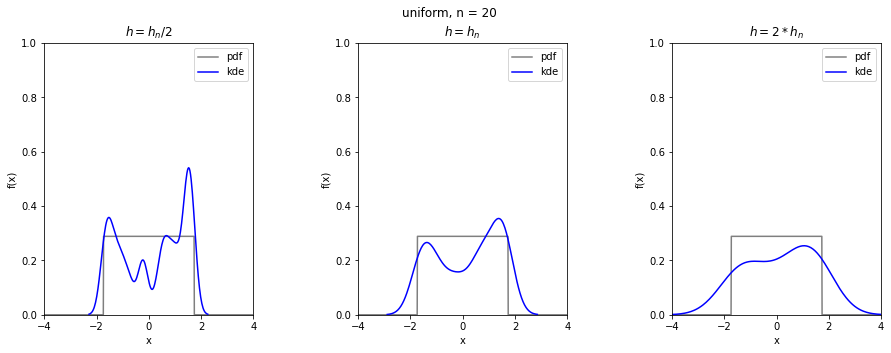

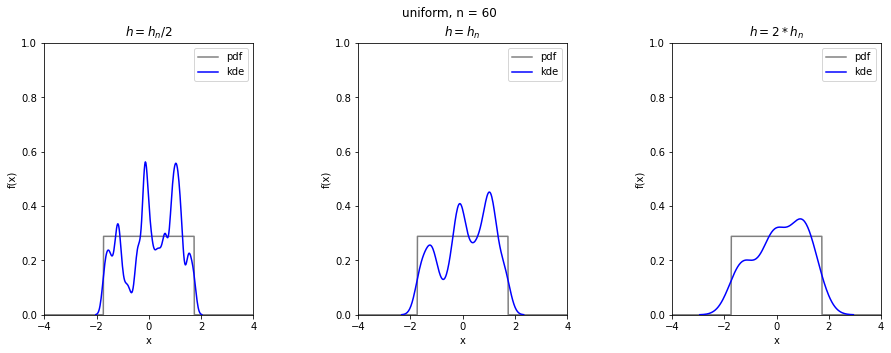

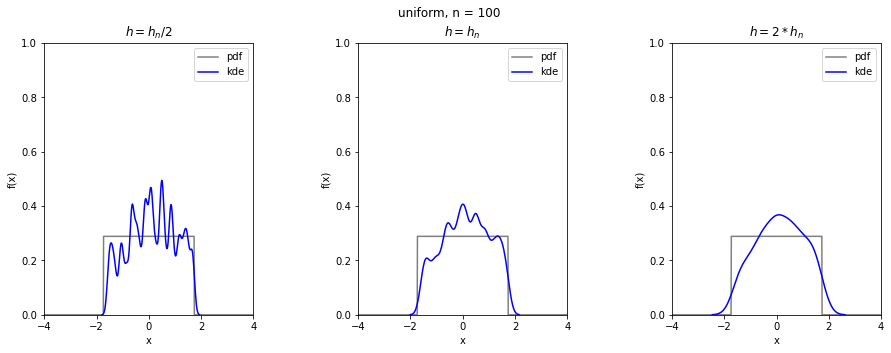

In [58]:
def plot_KDE(name):
    koef_list = [0.5, 1, 2]
    samples, x, start, stop = get_samples(name)
    index = 1    
    for sample in samples:       
        headers = [r'$h = h_n/2$', r'$h = h_n$', r'$h = 2 * h_n$']
        f, axs = plt.subplots(1,3,figsize=(15, 5))
        plt.subplots_adjust(wspace=0.5)
        i = 0
        for koef in koef_list:
            kde = stats.gaussian_kde(sample, bw_method='silverman')
            h_n = kde.factor
            f.suptitle(name + ', n = ' + str(dist_size[index - 1]))
            axs[i].plot(x, pdf_distribution[name](x), color='black', alpha=0.5, label='pdf')
            axs[i].set_title(headers[i])
            sns.kdeplot(sample, ax=axs[i], bw_adjust =h_n * koef, label='kde', color='blue')
            axs[i].set_xlabel('x')
            axs[i].set_ylabel('f(x)')
            axs[i].set_ylim([0, 1])
            axs[i].set_xlim([start, stop])
            axs[i].legend()
            i = i + 1
            plt.savefig(name + 'KDE' + str(dist_size[index - 1]) + '.png', format='png')
        index += 1
        
for name in distribution_fun:
    plot_KDE(name)
        